In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras import layers, losses
from sklearn.model_selection import train_test_split
from keras.models import Model

import warnings
warnings.filterwarnings('ignore')


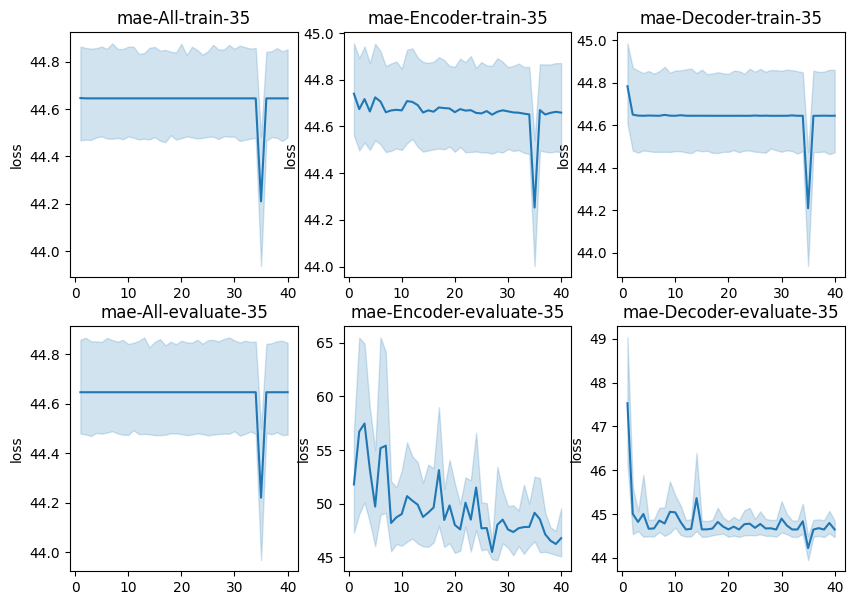

In [70]:
f, axs= plt.subplots(2, 3, figsize = (10,7))
models = ['All', 'Encoder', 'Decoder', 'All', 'Encoder', 'Decoder']
loss= 'mae'
for i, model in enumerate(models):
    train_evaluate = 'train'
    l = 0
    c = i
    if i>2:
        train_evaluate = 'evaluate'
        l = 1
        c = i-3
    data = pd.read_csv(f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/SKAB/CNN/{train_evaluate}/loss_{loss}_{model}.csv', names = ['cid', 'round', 'loss'])
    sns.lineplot(data = data, x = 'round', y = 'loss', ax = axs[l][c])
    axs[l][c].set_title(f'{loss}-{model}-{train_evaluate}-35')
    axs[l][c].set_xlabel('')

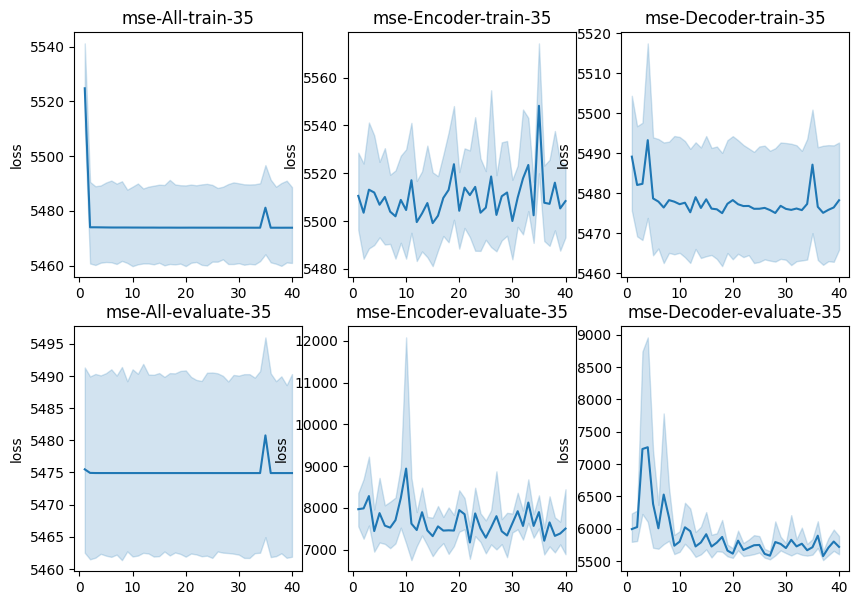

In [71]:
f, axs= plt.subplots(2, 3, figsize = (10,7))
models = ['All', 'Encoder', 'Decoder', 'All', 'Encoder', 'Decoder']
loss= 'mse'
for i, model in enumerate(models):
    train_evaluate = 'train'
    l = 0
    c = i
    if i>2:
        train_evaluate = 'evaluate'
        l = 1
        c = i-3
    data = pd.read_csv(f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/SKAB/CNN/{train_evaluate}/loss_{loss}_{model}.csv', names = ['cid', 'round', 'loss'])
    sns.lineplot(data = data, x = 'round', y = 'loss', ax = axs[l][c])
    axs[l][c].set_title(f'{loss}-{model}-{train_evaluate}-35')
    axs[l][c].set_xlabel('')
    

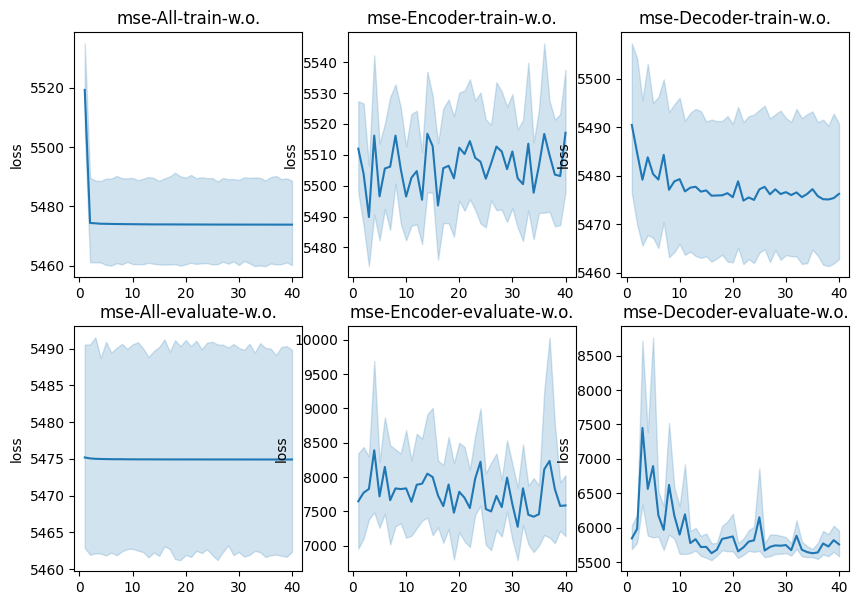

In [72]:
f, axs= plt.subplots(2, 3, figsize = (10,7))
models = ['All', 'Encoder', 'Decoder', 'All', 'Encoder', 'Decoder']
loss= 'mse'
for i, model in enumerate(models):
    train_evaluate = 'train'
    l = 0
    c = i
    if i>2:
        train_evaluate = 'evaluate'
        l = 1
        c = i-3
    data = pd.read_csv(f'/home/gabrieltalasso/IoT_Anomaly_Detection/logs/SKAB/CNN/wo_anomaly/{train_evaluate}/loss_{loss}_{model}.csv', names = ['cid', 'round', 'loss'])
    sns.lineplot(data, x = 'round', y = 'loss', ax = axs[l][c])
    axs[l][c].set_title(f'{loss}-{model}-{train_evaluate}-w.o.')
    axs[l][c].set_xlabel('')

In [73]:
for cid in range(16):
    data[data['cid'] == cid]['std'] = anomaly_detect(data, cid)


In [74]:
data['std'] = data['loss'].expanding(2).std()

In [75]:
data

,cid,round,loss,std
0,0,1,5806.685059,NaN
1,6,1,5635.641602,120.945988
2,12,1,5562.461426,125.337135
3,14,1,6208.799805,288.994850
4,4,1,5489.812500,286.889459
...,...,...,...,...
635,13,40,6060.876465,971.222156
636,3,40,5517.197754,970.589147
637,0,40,5572.211426,969.924049
638,5,40,6172.494141,969.215821


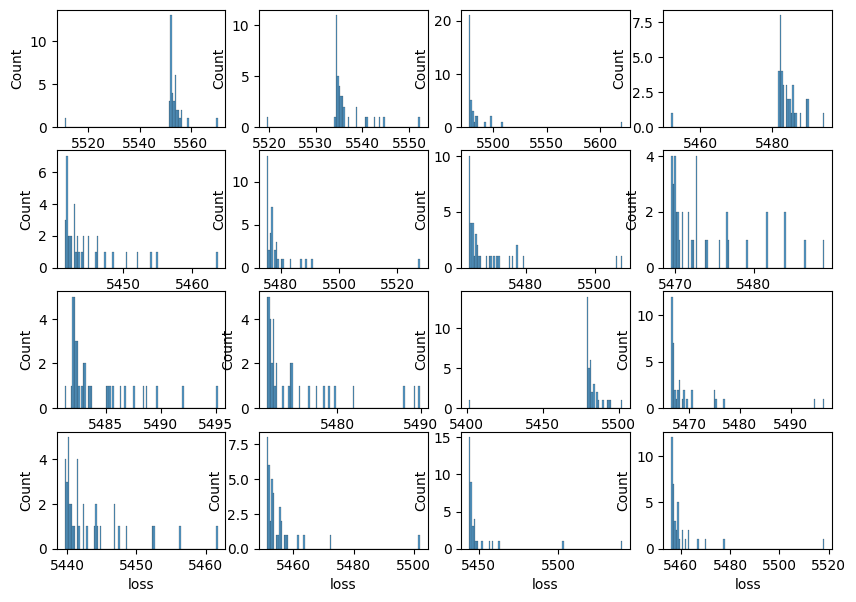

In [76]:
data = pd.read_csv('/home/gabrieltalasso/IoT_Anomaly_Detection/logs/SKAB/CNN/train/loss_mse_Decoder.csv', names = ['cid', 'round', 'loss'])
#sns.lineplot(data = data.groupby('round').mean(), x = 'round', y = 'loss')
f, ax = plt.subplots(4, 4, figsize = (10,7))
axs = ax.flatten()

for i in range(16):
    sns.histplot(data = data[data['cid'] == i][data['round']>1], x = 'loss', bins = 100, ax = axs[i])